# Titanic: Machine Learning from Disaster

### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Drop PassengerId for train set and test set but backup for the test set submission

In [5]:
train.drop("PassengerId", axis = 1, inplace = True)

In [6]:
testPassengerId = test["PassengerId"] # for submission

In [7]:
test.drop("PassengerId", axis = 1, inplace = True)

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Make columns into variables

In [10]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
survived = "Survived"
pClass = "Pclass"
name = "Name"
sex = "Sex"
age = "Age"
sibSp = "SibSp"
parch = "Parch"
ticket = "Ticket"
fare = "Fare"
cabin = "Cabin"
embarked = "Embarked"

### Data exploration

Pclass

In [12]:
print(train[pClass].isnull().sum(), test[pClass].isnull().sum())

0 0


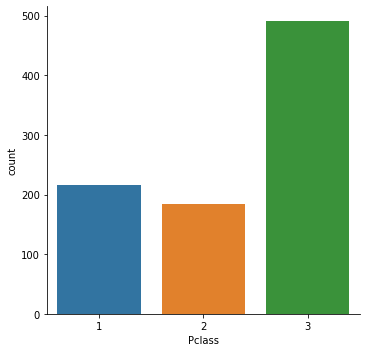

In [13]:
sns.catplot(x = pClass, kind = "count", data = train)

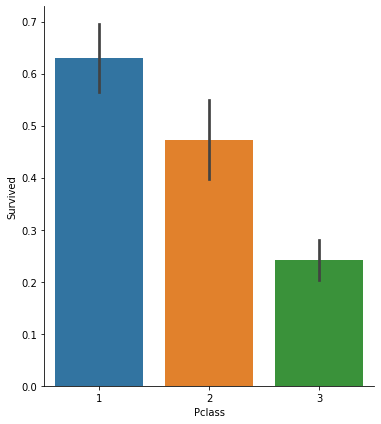

In [14]:
sns.catplot(x = pClass, y = survived, kind = "bar", data = train, height = 6, aspect = 0.9)

Sex

In [15]:
print(train[sex].isnull().sum(), test[sex].isnull().sum())

0 0


In [16]:
train[sex].value_counts()

male      577
female    314
Name: Sex, dtype: int64

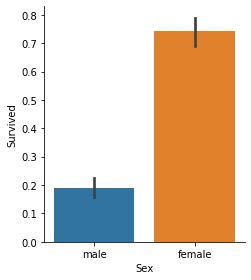

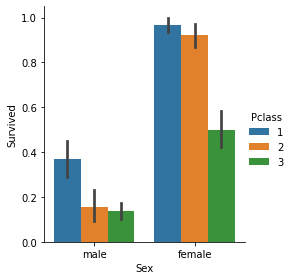

In [17]:
sns.catplot(x = sex, y = survived, kind = "bar", data = train, height = 4, aspect = 0.9)
sns.catplot(x = sex, y = survived, hue = pClass, kind = "bar", data = train, height = 4, aspect = 0.9)

Age

In [18]:
print(train[age].isnull().sum(), "/", len(train[age]), "|", test[age].isnull().sum(), "/", len(test[age]))

177 / 891 | 86 / 418


In [19]:
meanAgePclass1 = np.mean(train[train[pClass] == 1][age].dropna())
meanAgePclass2 = np.mean(train[train[pClass] == 2][age].dropna())
meanAgePclass3 = np.mean(train[train[pClass] == 3][age].dropna())
print(meanAgePclass1, meanAgePclass2, meanAgePclass3)

38.233440860215055 29.87763005780347 25.14061971830986


In [20]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if (pd.isnull(Age)):
        if Pclass == 1:
            return meanAgePclass1
        elif Pclass == 2:
            return meanAgePclass2
        else:
            return meanAgePclass3
    else:
        return Age

In [21]:
train[age] = train[[age, pClass]].apply(imputeAge, axis = 1)

In [22]:
meanAgePclass1 = np.mean(test[test[pClass] == 1][age].dropna())
meanAgePclass2 = np.mean(test[test[pClass] == 2][age].dropna())
meanAgePclass3 = np.mean(test[test[pClass] == 3][age].dropna())
print(meanAgePclass1, meanAgePclass2, meanAgePclass3)

40.91836734693877 28.7775 24.02794520547945


In [23]:
test[age] = test[[age, pClass]].apply(imputeAge, axis = 1)

In [24]:
print(train[age].isnull().sum(), "/", len(train[age]), "|", test[age].isnull().sum(), "/", len(test[age]))

0 / 891 | 0 / 418


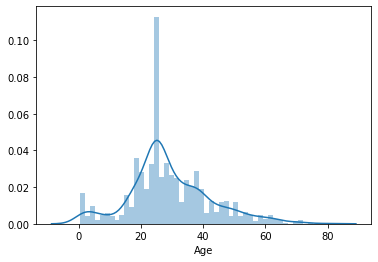

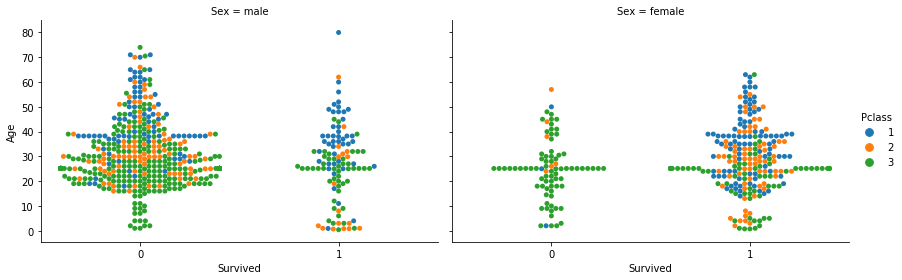

In [25]:
sns.distplot(train[age], bins = 50)
sns.catplot(x = survived, y = age, hue = pClass, col = sex, kind = "swarm", data = train, height = 4, aspect = 1.5)

SibSp

In [26]:
print(train[sibSp].isnull().sum(), test[sibSp].isnull().sum())

0 0


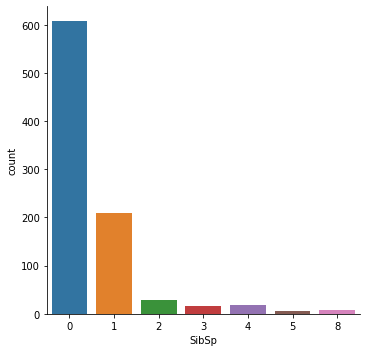

In [27]:
sns.catplot(x = sibSp, kind = "count", data = train)

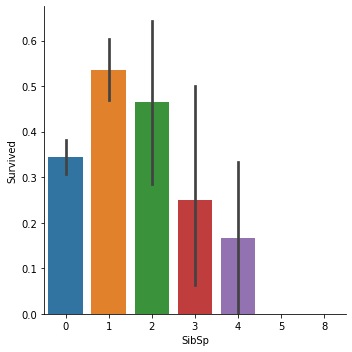

In [28]:
sns.catplot(x = sibSp, y = survived, kind = "bar", data = train)

Parch

In [29]:
print(train[parch].isnull().sum(), test[parch].isnull().sum())

0 0


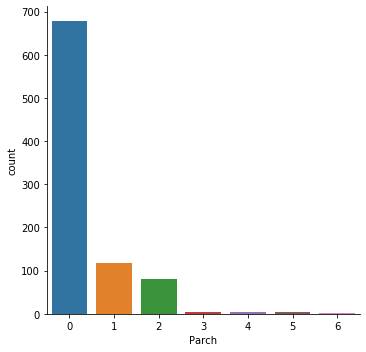

In [30]:
sns.catplot(x = parch, kind = "count", data = train)

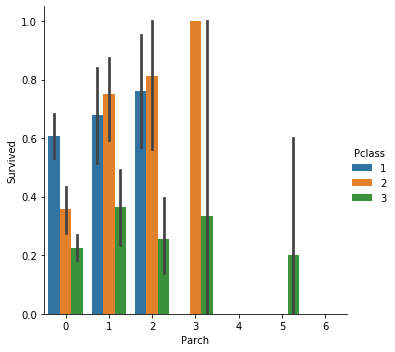

In [31]:
sns.catplot(x = parch, y = survived, hue = pClass, kind = "bar", data = train)

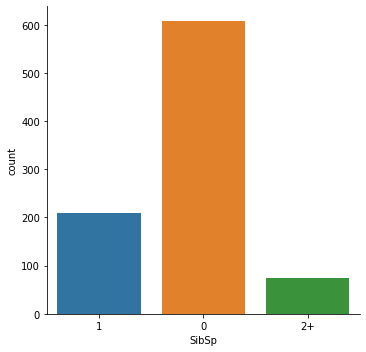

In [32]:
train[sibSp] = train[sibSp].astype("str")
train.loc[train[sibSp] >= '2', sibSp] = "2+"
sns.catplot(x = sibSp, kind = "count", data = train)

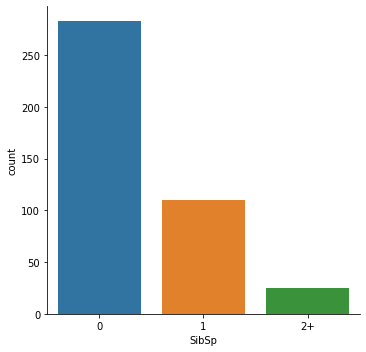

In [33]:
test[sibSp] = test[sibSp].astype("str")
test.loc[test[sibSp] >= '2', sibSp] = "2+"
sns.catplot(x = sibSp, kind = "count", data = test)

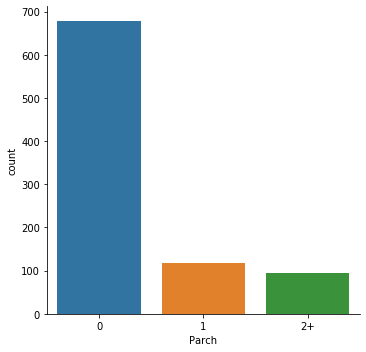

In [34]:
train[parch] = train[parch].astype("str")
train.loc[train[parch] >= '2', parch] = "2+"
sns.catplot(x = parch, kind = "count", data = train)

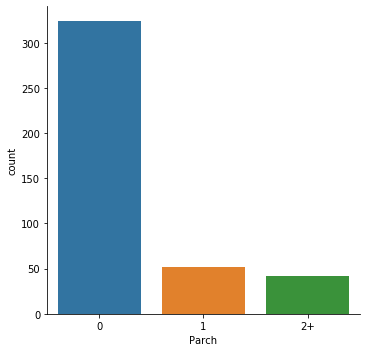

In [35]:
test[parch] = test[parch].astype("str")
test.loc[test[parch] >= '2', parch] = "2+"
sns.catplot(x = parch, kind = "count", data = test)

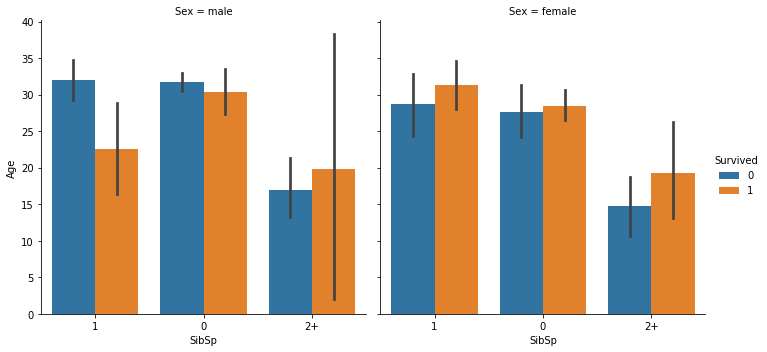

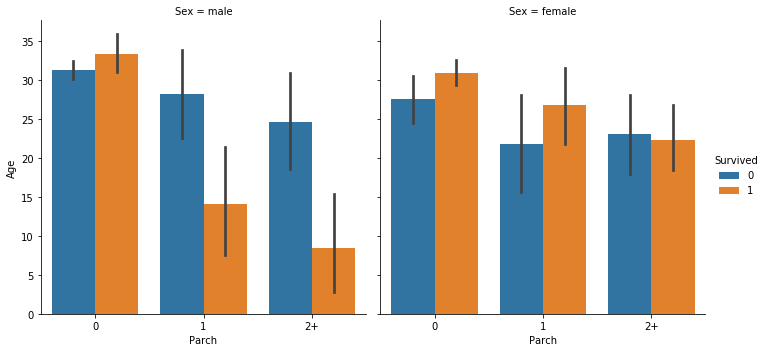

In [36]:
sns.catplot(x = sibSp, y = age, hue = survived, col = sex, kind = "bar", data = train)
sns.catplot(x = parch, y = age, hue = survived, col = sex, kind = "bar", data = train)

Ticket

In [37]:
print(train[ticket].isnull().sum(), test[ticket].isnull().sum())

0 0


In [38]:
train.drop(ticket, axis = 1, inplace = True)
test.drop(ticket, axis = 1, inplace = True)

Fare

In [39]:
print(train[fare].isnull().sum(), test[fare].isnull().sum())

0 1


In [40]:
test[fare].fillna(test[fare].dropna().mean(), inplace = True)

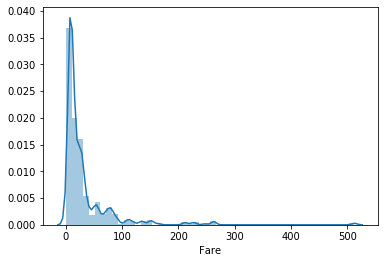

In [41]:
sns.distplot(train[fare], bins = 50)

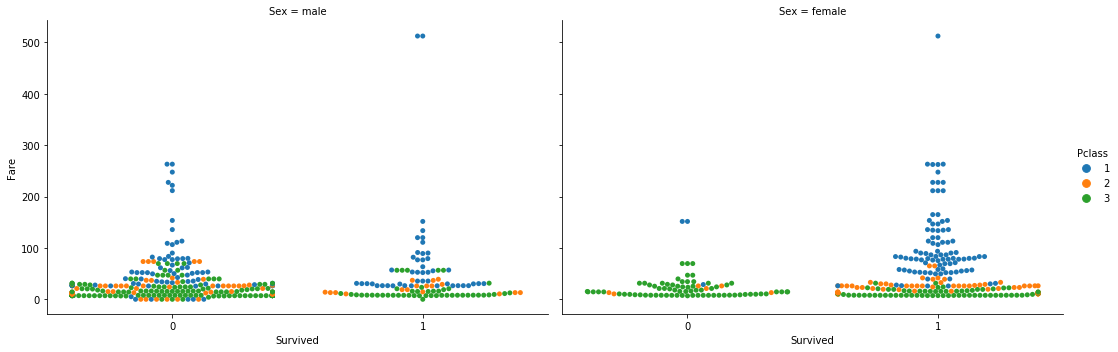

In [42]:
sns.catplot(x = survived, y = fare, col = sex, hue = pClass, data = train, kind = "swarm", height = 5, aspect = 1.5)

Cabin

In [43]:
print(train[cabin].isnull().sum(), test[cabin].isnull().sum())

687 327


In [44]:
train.drop(cabin, axis = 1, inplace = True)
test.drop(cabin, axis = 1, inplace = True)

Embarked

In [45]:
print(train[embarked].isnull().sum(), test[embarked].isnull().sum())

2 0


In [46]:
train.dropna(subset = [embarked], inplace = True)

In [47]:
train[embarked].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

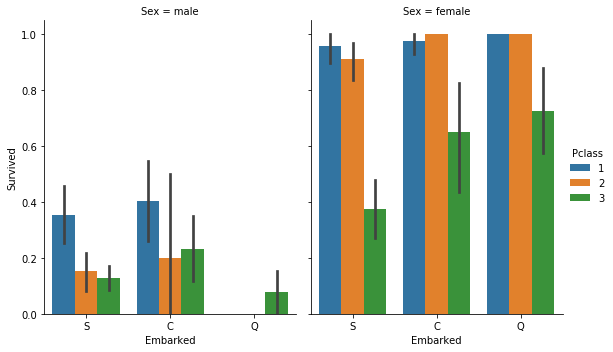

In [48]:
sns.catplot(x = embarked, y = survived, hue = pClass, col = sex, data = train, kind = "bar", height = 5, aspect = 0.8)

Name

In [49]:
train.drop(name, axis = 1, inplace = True)
test.drop(name, axis = 1, inplace = True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null object
Parch       889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 102.5+ KB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null object
Parch       418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 23.0+ KB


Convert categorical to numerical

In [52]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [54]:
catCols = [pClass, sex, sibSp, parch, embarked]

In [55]:
for col in catCols:
    dummies = pd.get_dummies(train[col], prefix = col, drop_first = True)
    train = pd.concat([train, dummies], axis = 1)
    train.drop(col, axis = 1, inplace = True)

In [56]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2+,Parch_1,Parch_2+,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,1


In [57]:
for col in catCols:
    dummies = pd.get_dummies(test[col], prefix = col, drop_first = True)
    test = pd.concat([test, dummies], axis = 1)
    test.drop(col, axis = 1, inplace = True)

In [58]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2+,Parch_1,Parch_2+,Embarked_Q,Embarked_S
0,34.5,7.8292,0,1,1,0,0,0,0,1,0
1,47.0,7.0000,0,1,0,1,0,0,0,0,1
2,62.0,9.6875,1,0,1,0,0,0,0,1,0
3,27.0,8.6625,0,1,1,0,0,0,0,0,1
4,22.0,12.2875,0,1,0,1,0,1,0,0,1


### Split data

In [59]:
X = train.drop(survived, axis = 1)
y = train[survived]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Train model

Support Vector Machine

In [62]:
from sklearn.svm import SVC

In [63]:
svcModel = SVC(C = 5.0, kernel = "poly", degree = 5, cache_size = 500)
svcModel.fit(X_train, y_train)

SVC(C=5.0, break_ties=False, cache_size=500, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Stochastic Gradient Descent

In [64]:
from sklearn.linear_model import SGDClassifier

In [65]:
sgdModel = SGDClassifier(loss = "hinge", penalty = "l2", max_iter = 1000)
sgdModel.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfModel = RandomForestClassifier()
#rfModel.fit(X_train, y_train)

Hyperparameter tuning for Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [70]:
rf_gs = GridSearchCV(estimator = rfModel, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lrModel = LogisticRegression(max_iter = 5000, C = 5.0, penalty = "l1", verbose = 1, warm_start = True, solver = "liblinear")
lrModel.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=True)

In [74]:
svcModelPrediction = svcModel.predict(X_test)
sgdModelPrediction = sgdModel.predict(X_test)
rfModelPrediction = rf_gs.predict(X_test)
lrModelPrediction = lrModel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(
    classification_report(y_test, svcModelPrediction),
    classification_report(y_test, sgdModelPrediction),
    classification_report(y_test, rfModelPrediction),
    classification_report(y_test, lrModelPrediction)
)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       167
           1       0.69      0.11      0.19       100

    accuracy                           0.65       267
   macro avg       0.67      0.54      0.48       267
weighted avg       0.66      0.65      0.56       267
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       167
           1       0.60      0.63      0.61       100

    accuracy                           0.70       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.71      0.70      0.71       267
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       167
           1       0.77      0.66      0.71       100

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267
               preci

In [77]:
subPrediction = rf_gs.predict(test)

In [78]:
submission = pd.DataFrame(data = {
    "PassengerId": testPassengerId,
    "Survived": subPrediction
})

In [79]:
submission.to_csv("submission", index=False)